Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305

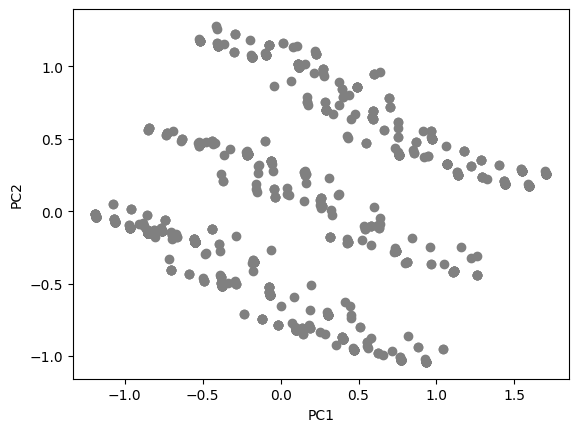

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

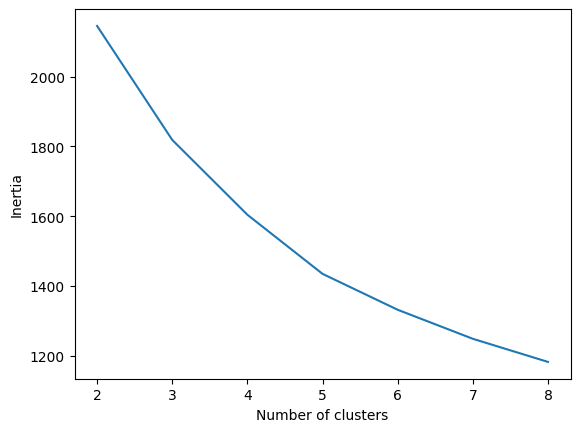

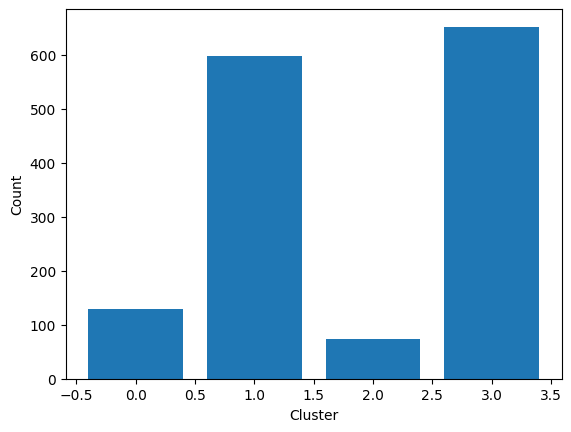

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


col_0   0    1   2    3
row_0                  
0      20  302   0  191
1       2  116  59  189
2      90   30  14  108
3      17  150   1  164
11.727872558164462
11.727872558164462
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: Like, dtype: int64


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

mcdonalds = pd.read_csv("mcdonalds.csv")

print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))

MD_x = mcdonalds.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)

print(np.round(np.mean(MD_x, axis=0), 2))

MD_pca = PCA()
MD_pca.fit(MD_x)
print(MD_pca.explained_variance_ratio_)
print(MD_pca.singular_values_)

plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], color="grey")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

k_range = range(2, 9)
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)
plt.plot(k_range, inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x)
labels = gmm.predict(MD_x)
plt.hist(labels, bins=range(5), align="left", rwidth=0.8)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

kmeans_labels = KMeans(n_clusters=4, random_state=1234).fit_predict(MD_x)
gmm_labels = GaussianMixture(n_components=4, random_state=1234).fit_predict(MD_x)
table = pd.crosstab(index=kmeans_labels, columns=gmm_labels)
print(table)

gmm_m4a = GaussianMixture(n_components=4, random_state=1234)
gmm_m4a.fit(MD_x)
log_likelihood_m4a = gmm_m4a.score(MD_x)
print(log_likelihood_m4a)

gmm_m4 = GaussianMixture(n_components=4, random_state=1234)
gmm_m4.fit(MD_x)
log_likelihood_m4 = gmm_m4.score(MD_x)
print(log_likelihood_m4)

like_counts = mcdonalds["Like"].value_counts().sort_index(ascending=False)
print(like_counts)
